IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\weather_classification_data.csv')

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


CHECKING MISSING VALUES

In [4]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


DATA DISTRIBUTION

In [7]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

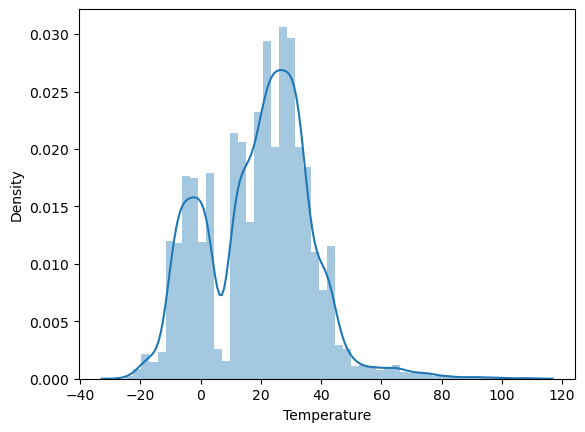

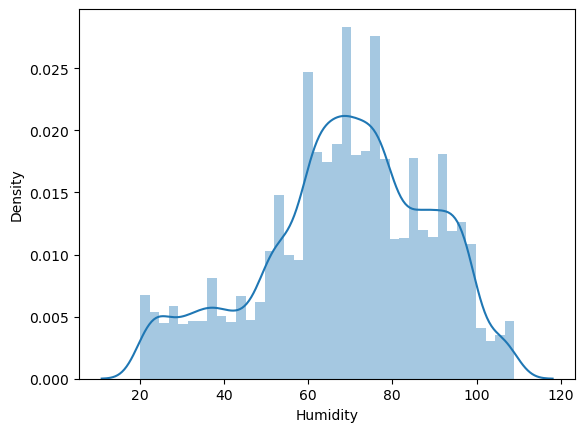

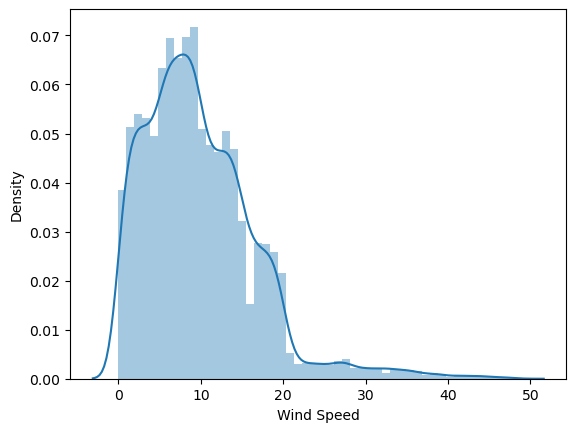

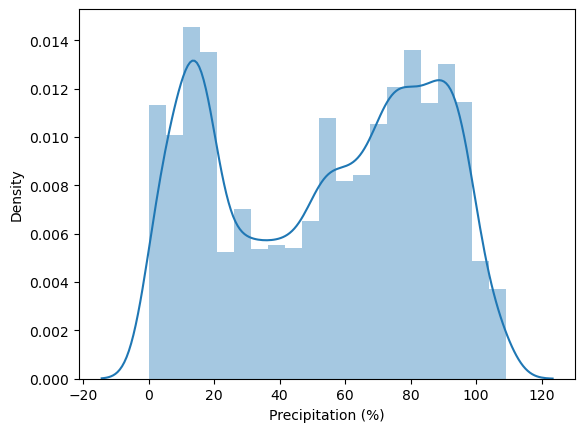

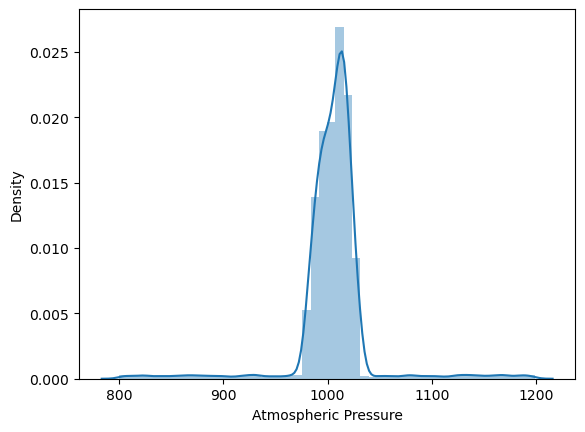

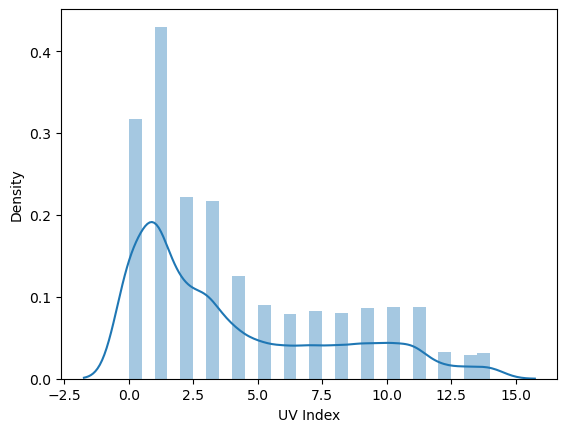

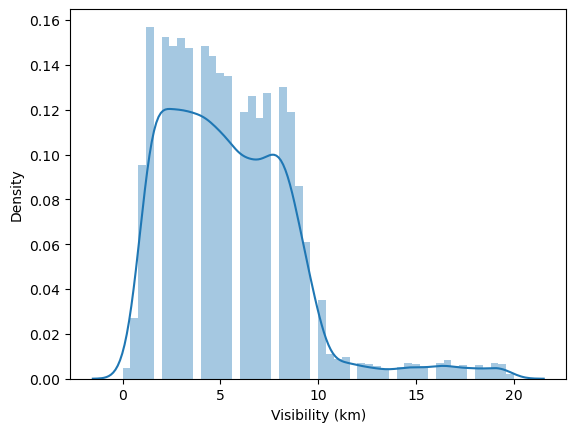

In [8]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

COUNTS FOR CLOUD COVER

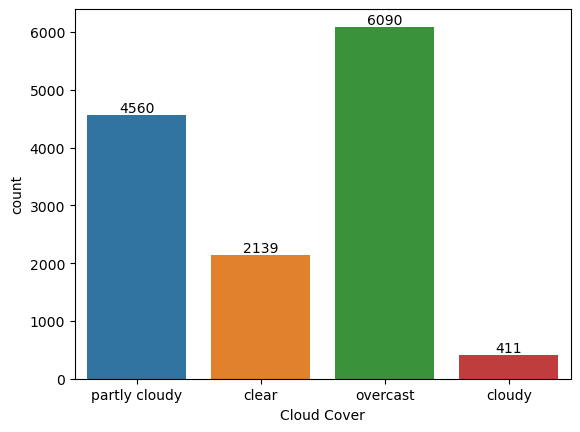

In [9]:
ax=sns.countplot(df, x='Cloud Cover', hue='Cloud Cover')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

COUNT OF SEASON

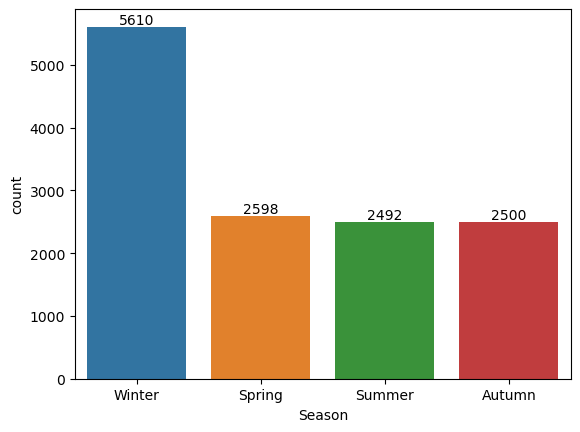

In [10]:
ax=sns.countplot(df, x='Season', hue='Season')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

COUNTS FOR WEATHER TYPE

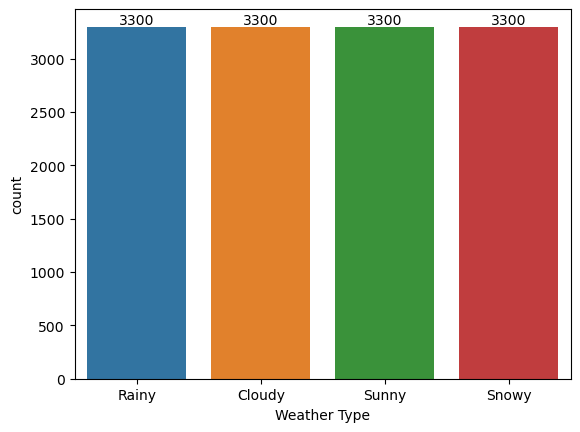

In [11]:
ax=sns.countplot(df, x='Weather Type', hue='Weather Type')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show() 

In [12]:
df.groupby('Weather Type')['Temperature'].value_counts().sort_values(ascending=False).head(7)

Weather Type  Temperature
Snowy          2.0           223
              -2.0           212
              -4.0           210
              -7.0           203
               1.0           200
               0.0           196
              -6.0           194
Name: count, dtype: int64

In [13]:
dp=df[df['Weather Type']=='Rainy']
dp

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
26,17.0,72,7.5,62.0,overcast,1010.16,2,Summer,3.0,mountain,Rainy
29,30.0,70,16.0,54.0,partly cloudy,1007.75,0,Winter,3.0,mountain,Rainy
30,28.0,85,7.0,97.0,overcast,991.07,1,Spring,2.0,coastal,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13180,10.0,62,17.0,83.0,partly cloudy,1013.09,3,Summer,3.0,mountain,Rainy
13184,3.0,62,7.5,14.0,overcast,1128.35,3,Summer,7.5,mountain,Rainy
13185,37.0,106,23.5,104.0,partly cloudy,998.71,14,Summer,3.0,coastal,Rainy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy


In [14]:
dp['Temperature'].min()

-20.0

In [15]:
dp['Temperature'].max()

84.0

In [16]:
dp['Season'].unique()

array(['Winter', 'Summer', 'Spring', 'Autumn'], dtype=object)

In [17]:
dt=df[df['Weather Type']=='Snowy']
dt.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
13,-10.0,87,15.0,67.0,overcast,986.19,0,Winter,1.5,inland,Snowy
20,-10.0,67,8.5,75.0,overcast,991.53,1,Winter,3.0,mountain,Snowy


In [18]:
dt['Temperature'].min()

-25.0

In [19]:
dt['Temperature'].max()

49.0

ENCODING COLUMNS IN THE DATASET

In [20]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df['Cloud Cover']=enco.fit_transform(df['Cloud Cover'])
df['Season']=enco.fit_transform(df['Season'])
df['Location']=enco.fit_transform(df['Location'])
df['Weather Type']=enco.fit_transform(df['Weather Type'])

DATA CORRELATION

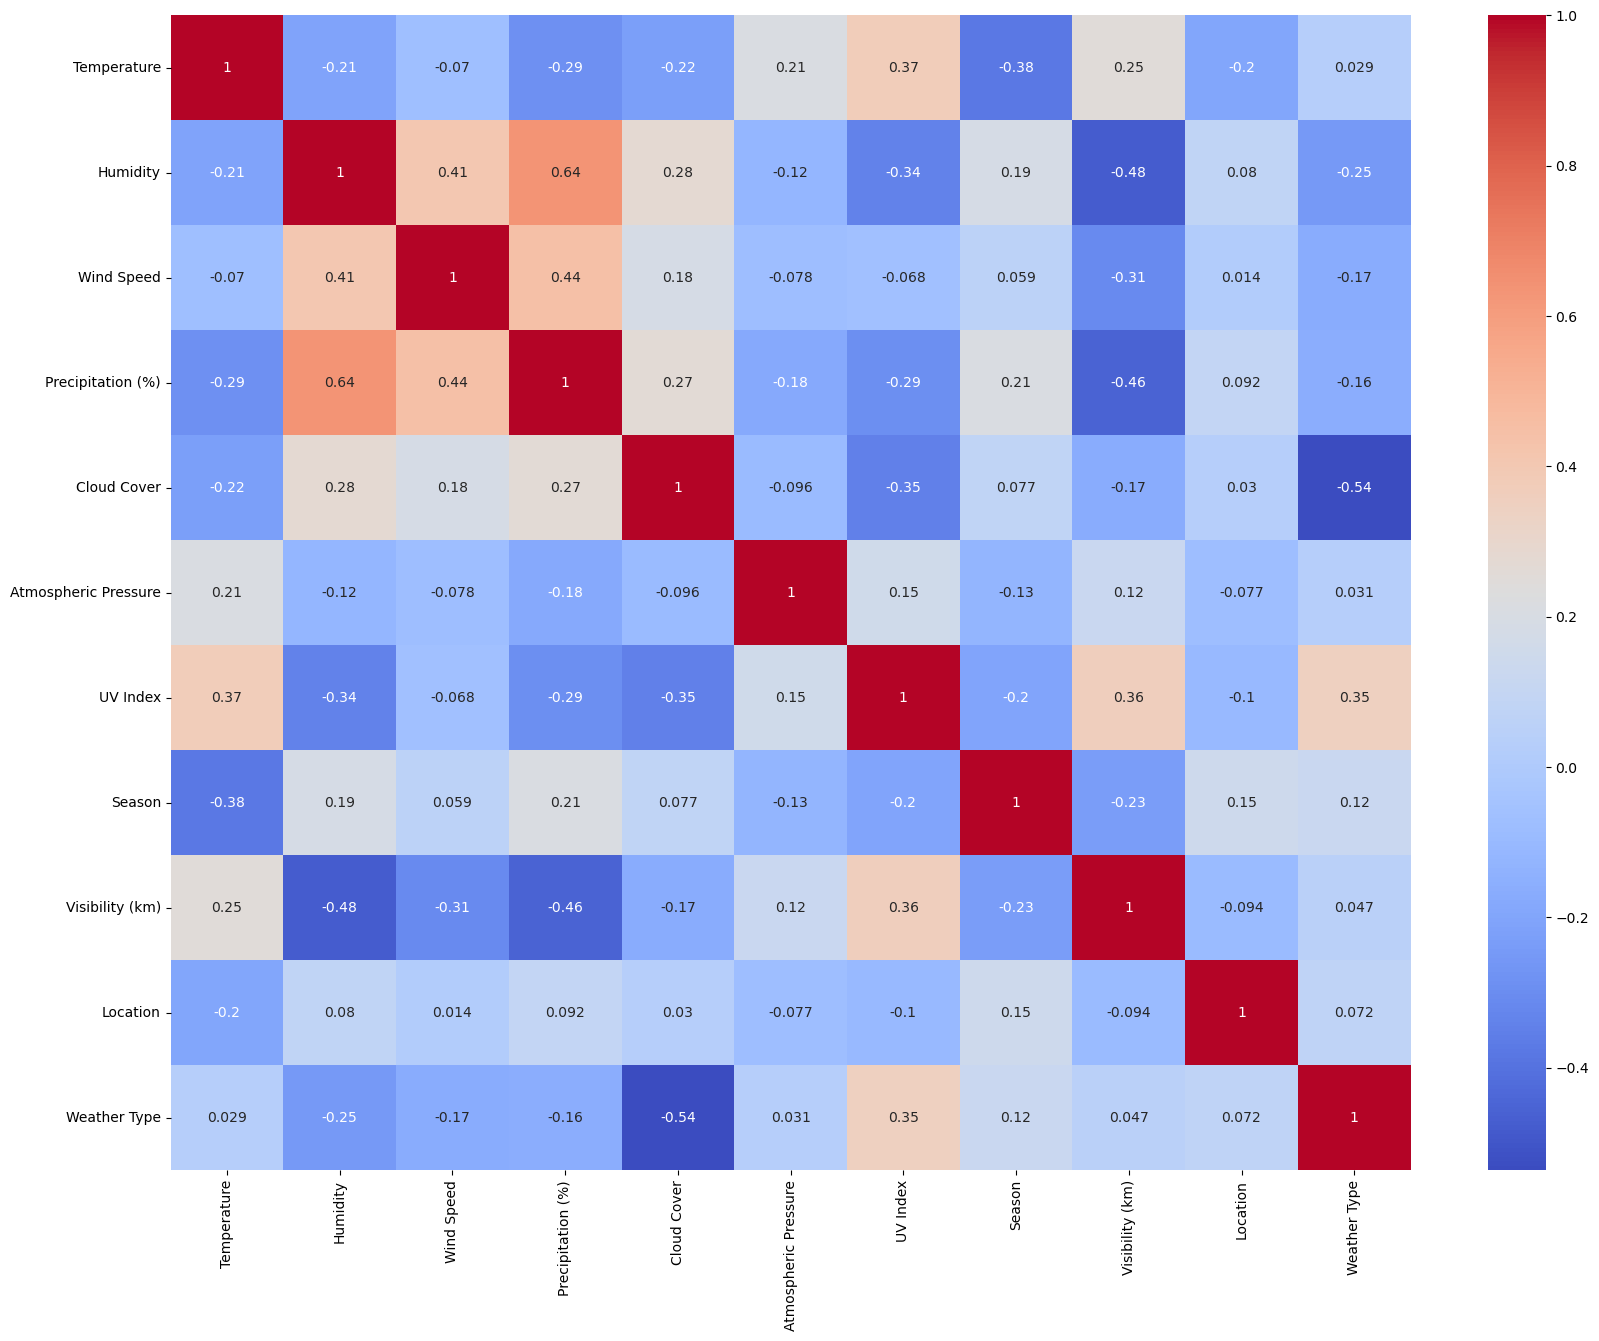

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

DEPENDENT AND INDEPENT DATA COLUMNS, SCALING THE DATA, MODEL SELECTION

In [22]:
x=df.drop('Weather Type',axis=1)
y=df['Weather Type']

In [23]:
from sklearn.preprocessing import StandardScaler
scala=StandardScaler()
x=scala.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

LOGISTIC REGRESSION AND ITS MODEL EVALUATION

In [25]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [26]:
yhat_train_lreg=lreg.predict(x_train)
yhat_test_lreg=lreg.predict(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
print(classification_report(y_train, yhat_train_lreg))
print()
print(classification_report(y_test, yhat_test_lreg))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2648
           1       0.85      0.86      0.85      2594
           2       0.89      0.93      0.91      2653
           3       0.87      0.82      0.84      2665

    accuracy                           0.86     10560
   macro avg       0.86      0.86      0.86     10560
weighted avg       0.86      0.86      0.86     10560


              precision    recall  f1-score   support

           0       0.81      0.82      0.81       652
           1       0.86      0.86      0.86       706
           2       0.89      0.92      0.90       647
           3       0.86      0.81      0.84       635

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640



In [29]:
print(confusion_matrix(y_train, yhat_train_lreg))
print()
print(confusion_matrix(y_test, yhat_test_lreg))

[[2182  235   84  147]
 [ 138 2229  136   91]
 [  73   32 2463   85]
 [ 274  141   73 2177]]

[[534  59  20  39]
 [ 36 610  38  22]
 [ 22   8 596  21]
 [ 70  31  17 517]]


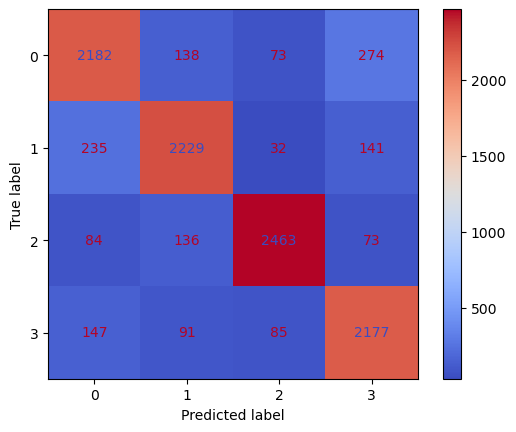

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lreg, y_train))
c_matrix.plot(cmap='coolwarm')

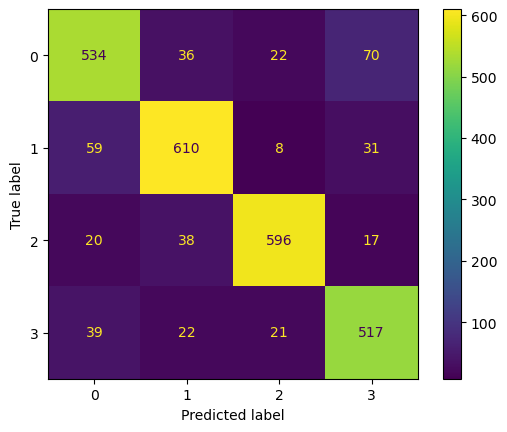

In [31]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lreg, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lreg,x,y,cv=3)
np.mean(scores)

0.8561363636363636

RANDOM FOREST AND ITS MODEL EVALUATION

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
yhat1_train_rfc=rfc.predict(x_train)
yhat1_test_rfc=rfc.predict(x_test)

In [35]:
print(classification_report(y_train, yhat1_train_rfc))
print()
print(classification_report(y_test, yhat1_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2648
           1       1.00      1.00      1.00      2594
           2       1.00      1.00      1.00      2653
           3       1.00      1.00      1.00      2665

    accuracy                           1.00     10560
   macro avg       1.00      1.00      1.00     10560
weighted avg       1.00      1.00      1.00     10560


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       652
           1       0.90      0.91      0.90       706
           2       0.93      0.91      0.92       647
           3       0.92      0.90      0.91       635

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [36]:
print(confusion_matrix(y_train, yhat1_train_rfc))
print()
print(confusion_matrix(y_test, yhat1_test_rfc))

[[2648    0    0    0]
 [   0 2594    0    0]
 [   0    0 2653    0]
 [   0    0    0 2665]]

[[586  34  16  16]
 [ 37 639  14  16]
 [ 20  17 589  21]
 [ 28  20  13 574]]


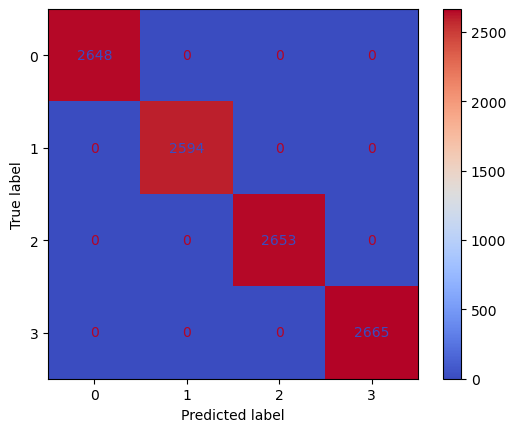

In [37]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_train_rfc, y_train))
c_matrix.plot(cmap='coolwarm')

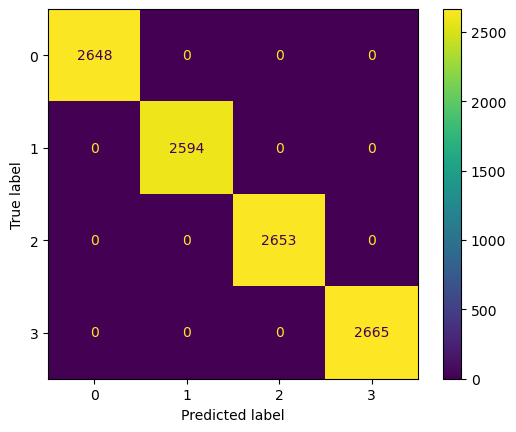

In [38]:
c_matric=ConfusionMatrixDisplay(confusion_matrix(yhat1_test_rfc, y_test))
c_matrix.plot(cmap='viridis')

In [39]:
scores=cross_val_score(rfc,x,y,cv=3)
np.mean(scores)

0.9131818181818181

CONCLUSION

In [ ]:
RANDOM FOREST MODEL HAD THE BEST ACCURACY OF 91%

LOGISTIC REGRESSION MODEL HAD AN ACCURACY OF 86%